In [1]:
import numpy as np
import scipy.io as sio
import os
import euGenFuncs as eu
import numpy as np
import pandas as pd
import pickle
import ieeg_funcs as ief
import dgFuncs as dg
import matplotlib.pyplot as plt
# %matplotlib inline
import imp 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


In [ ]:
npz=np.load('/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/KDOWNSAMP/kdownsampled_1096.npz')
npz.keys()
npz['ftrs_dsamp'].shape

(742579, 30)
['ftrs', 'szr_class', 'sub_id', 'train_subs_list', 'bnded']


<IPython.core.display.Javascript object>


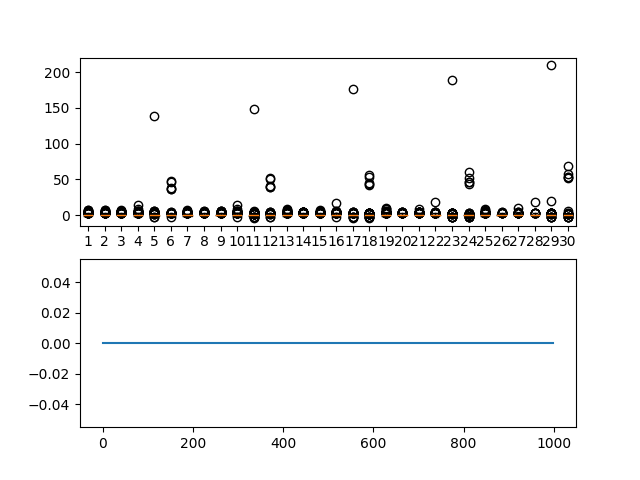

In [2]:
infname='/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/train_ftrs_unbnded_se_dsamp500.npz'
se=np.load(infname)
print(se['ftrs'].shape)
print(se.keys())

show_wind=np.arange(0,1000);
plt.figure(1)
plt.clf()
plt.subplot(2,1,1)
plt.boxplot(se['ftrs'][show_wind,:]);
#plt.plot(se['ftrs'][show_wind,:].T);

plt.subplot(2,1,2)
plt.plot(se['szr_class'][show_wind]);

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(se['ftrs'])
# df['pca-one'] = pca_result[:,0]
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explained variance: {}'.format(np.sum(pca.explained_variance_ratio_)))

<IPython.core.display.Javascript object>


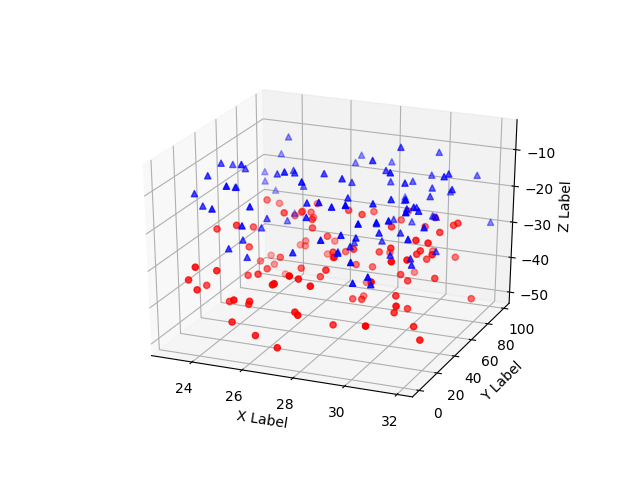

Text(0.5,0,'Z Label')

In [3]:


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [ ]:
infname='/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/train_ftrs_unbnded.npz'
plv=np.load(infname)
plv.keys()
print(plv['ftrs'].shape)
infname='/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/train_ftrs_bnded.npz'
se=np.load(infname)
print(se['ftrs'].shape)
se.keys()

In [ ]:
uni_subs=np.unique(se['sub_id'])
n_sub=len(uni_subs)
se_n=np.zeros(n_sub)
plv_n=np.zeros(n_sub)
for sub_ct, sub in enumerate(uni_subs):
    se_n[sub_ct]=np.sum(se['sub_id']==sub)
    plv_n[sub_ct]=np.sum(plv['sub_id']==sub)
    print('Sub %d, se_obs=%d plv_obs=%d se-plv=%d' % (sub,se_n[sub_ct],plv_n[sub_ct],se_n[sub_ct]-plv_n[sub_ct]))

In [ ]:
#in_fname='/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/train_ftrs_unbnded.npz'
#in_fname='/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/train_ftrs_bnded.npz'
in_fname='/home/dgroppe/GIT/SZR_ANT/EU_GENERAL/KDOWNSAMP/kdownsampled_253.npz'
npz=np.load(in_fname)
print(npz.keys())
print(npz['ftrs'].shape)

In [ ]:
npz=np.load('train_ftrs_bnded.npz')
print(npz.keys())
npz['ftrs'].shape

In [ ]:
plt.figure(1)
plt.clf()
plt.plot(npz['szr_class']);
plt.title('Szr Class')
plt.ylabel('1=Ictal')

In [ ]:
start_id=400000
plt.figure(1)
plt.clf()
plt.plot(npz['ftrs'][start_id:start_id+1000,:30]);
plt.title('Spectral Energy')
plt.ylabel('Z')

plt.figure(2)
plt.clf()
plt.plot(npz['ftrs'][start_id:start_id+1000,30:]);
plt.title('PLV')
plt.ylabel('Z')

plt.figure(3)
plt.clf()
plt.plot(npz['ftrs'][-1000:,:30]);
plt.title('Spectral Energy')
plt.ylabel('Z')

plt.figure(4)
plt.clf()
plt.plot(npz['ftrs'][-1000:,30:]);
plt.title('PLV')
plt.ylabel('Z')

In [ ]:
bro=np.load('norm_factors.npz')
print(bro.keys())
print(bro['cntr'])

In [ ]:
uni_flt=np.unique(npz['sub_id'])
min_ftrs=np.min(npz['ftrs'],axis=0)
min_ftrs.shape

In [ ]:
print(np.min(npz['ftrs']))
print(np.max(npz['ftrs']))

In [ ]:
print(np.min(npz['ftrs_dsamp']))
print(np.max(npz['ftrs_dsamp']))

In [ ]:
print(npz['ftrs'].shape)
print(np.min(npz['ftrs']))
print(np.max(npz['ftrs']))

In [ ]:
path_dict=ief.get_path_dict()
print(path_dict.keys())
print(path_dict['eu_meta'])
print(path_dict['eu_root'])
print(path_dict['szr_ant_root'])

In [ ]:
sub=864
szr_times_fname = os.path.join(path_dict['szr_ant_root'],'EU_METADATA','SZR_TIMES/',
                                   'szr_on_off_FR_' + str(sub) + '.pkl')
print(szr_times_fname)

In [ ]:
yhat_fname='/home/dgroppe/EU_YHAT/862_svmAesFinale_1/86200102_0057_yhat.npz'
yhat=np.load(yhat_fname)
print(yhat.keys())

y_fname='/home/dgroppe/EU_Y/862_all_labels/862_y_86200102_0057.mat'
y=sio.loadmat(y_fname)
print(y.keys())

In [ ]:
print(yhat['yhat_sec'].shape)
print(y['se_szr_class'].shape)
print(y['se_time_sec'].shape)
print(y['time_dec'].shape)
print(y['szr_class_dec'].shape)

In [ ]:
35436-34259

In [ ]:
np.squeeze(y['se_szr_class']).shape
np.squeeze(y['se_time_sec'])[1177:].shape

In [ ]:
# FIRST SZR
plt.figure(1)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])

#zoom in
plt.figure(2)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])
plt.xlim([2700, 3000])

In [ ]:
# First szr according to stimulated stim code
yhat_fname='/home/dgroppe/EU_YHAT/862_svmAesFinale_1/86201102_0141_yhat.npz'
yhat=np.load(yhat_fname)
print(yhat.keys())

y_fname='/home/dgroppe/EU_Y/862_all_labels/862_y_86201102_0141.mat'
y=sio.loadmat(y_fname)
print(y.keys())

plt.figure(1)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])

plt.figure(2)
plt.plot(np.squeeze(yhat['yhat_sec']),yhat['max_yhat'])
plt.plot(np.squeeze(y['se_time_sec'])[1177:],np.squeeze(y['se_szr_class']),'r-')
plt.title(yhat_fname.split('/')[-1])
plt.xlim([2700, 3000])

In [ ]:
print(np.max(dlt))
print(np.min(dlt))
#dlt=start_sec[1:]-start_sec[0:-1]
print(start_sec[0])
print(start_sec[1])
start_sec[1]-start_sec[0]

In [ ]:
plt.figure(8)
plt.plot(stim_sec)

In [ ]:
# Load list of szrs
#sub=862
sub=264
print('Sub=%d' % sub)
szr_times_fname=os.path.join('/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/','szr_on_off_FR_'+str(sub)+'.pkl')
szr_df=pickle.load(open(szr_times_fname,'rb'))
# szr_onset=szr_df['SzrOnsetSec']
n_szr=szr_df.shape[0]

# Load stimulation latencies
sbox=np.load('sbox.npz')
sbox.keys()
stim_sec=sbox['stim_sec']

# for szr_id in range(n_szr):
#     onset_sec=szr_df['SzrOnsetSec'][szr_id]
#     offset_sec=szr_df['SzrOffsetSec'][szr_id]
#     print(offset_sec-onset_sec)
    
# Loop over szrs and:


stim_lat=np.zeros(n_szr)
clin_szr=np.zeros(n_szr)
szr_hit=np.zeros(n_szr)
stim_sec_np=np.asarray(stim_sec)
for szr_id in range(n_szr):
    onset_sec=szr_df['SzrOnsetSec'][szr_id]
    offset_sec=szr_df['SzrOffsetSec'][szr_id]
    if szr_df['SzrType'][szr_id]=='Clinical':
        clin_szr[szr_id]=1
    
    # 1) find the stimulation that is closest in time to seizure onset
    nearest_id=dg.find_nearest(stim_sec,onset_sec)
    #nearest_id=dg.find_nearest(stim_sec_np,onset_sec)
    stim_lat[szr_id]=onset_sec-stim_sec[nearest_id]
    
            #         temp_id = np.argmin(np.abs(np.asarray(stim_ids) - onset_id))
        #         closest_id = stim_ids[temp_id]
    
    # 2) see if stimulation happens SOMEwhere in the target window
    #tim_bool=(stim_lat>=onset_sec) and (stim_lat<=offset_sec)
    stim_bool=np.multiply(stim_sec_np>=onset_sec-5,stim_sec_np<=offset_sec)
    if np.sum(stim_bool)>0:
        szr_hit[szr_id]=1
        
    print('Szr %d, lat %f, hit %d, duration=%f' % (szr_id,stim_lat[szr_id],szr_hit[szr_id],offset_sec-onset_sec))
    
print('%d clinical szrs' % np.sum(clin_szr))
print('%d subclinical szrs' % np.sum(clin_szr==0))
print('%d/%d szrs stimulated' % (np.sum(szr_hit),n_szr))

In [ ]:
szr_df.head()

In [ ]:
nearest_id=dg.find_nearest(stim_sec,onset_sec)
print(nearest_id)
print(onset_sec)
print(stim_sec[nearest_id])
print(onset_sec-stim_sec[nearest_id])

In [ ]:
# Load szr on off csv file which has been edited
in_fname='/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/szr_on_off_FR_922.csv'
on_off_df=pd.read_csv(in_fname)

In [ ]:
print(on_off_df.shape)
on_off_df.head()

In [ ]:
# output edits to pkl
pickle.dump(on_off_df,open('/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/szr_on_off_FR_922.pkl','wb'))

In [ ]:
bro=pickle.load(open('/home/dgroppe/GIT/SZR_ANT/EU_METADATA/SZR_TIMES/szr_on_off_FR_922.pkl','rb'))
print(bro.shape)